<a href="https://colab.research.google.com/github/toheedakhtar/pytorch-deeplearning/blob/main/notebooks/04_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch Custom Datasets

How do you get your own data in PyTorch.  
one of the ways is custom datset.

## Domain libraries
depending on what you're working on , vision, text, audio, recommendation, you'll want to look into each of the PyTorch exisitng data loading functions and customizable data loading functions.

## 0. Importing pytorch and setting up device agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.4.1+cu121'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get Data

our dataset is a subset of Food101 dataset.  
Food101 has 101 different classes of food.  
our dataset starts with 3 classes of food and 10% images of Food101 dataset  
(75train - 25test)  

Why do this?  
when starting out ML Projects, its important to try things on a small scale and then increaes the scale when necessary.  

The whole point is to speed up how fast you can experiment.

In [12]:
import requests
import zipfile
from pathlib import Path

# setup path to a datafolder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if image folder dosen't exist download
if image_path.is_dir():
  print(f"{image_path} dir already exists..Skipping to download.")
else:
  print(f"{image_path} dir dosen't exists.. creting one.")
  image_path.mkdir(parents=True, exist_ok=True)

# download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Download dataset...")
  f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipiing data...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi dir already exists..Skipping to download.
Download dataset...
unzipiing data...


## 2. Becoming one with the data (data preperation and data exploration)


In [15]:
import os
def walk_through_dir_path(dir_path):
  """Walks through dir_path returning its content"""

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


In [16]:
walk_through_dir_path(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [17]:
# setup train and test path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and Image

1. Get all of image path
1. Pick a random image path using python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with image, open the image with Python PIL library.
5. We'll then show the image and show metadata

In [18]:
import random
from PIL import Image

In [21]:
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/train/sushi/3579071.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/843815.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/377047.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/700405.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1552504.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2590819.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2980779.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1232045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1070104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/93139.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1209865.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/773725.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1571146.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/497686.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/200025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1957449.jpg'),
 PosixPath('data

Random image path : data/pizza_steak_sushi/test/pizza/2003290.jpg
Image class : pizza
image height: 384
Image width : 512


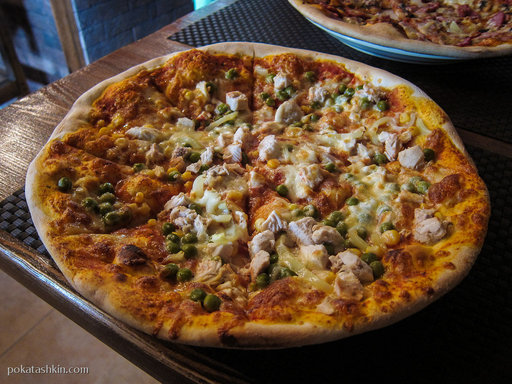

In [42]:
# 2. pick random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class, name of parent dir where image is stored
image_class = random_image_path.parent.stem

# 4. Open Image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path : {random_image_path}\nImage class : {image_class}")
print(f"image height: {img.height}\nImage width : {img.width}")
img

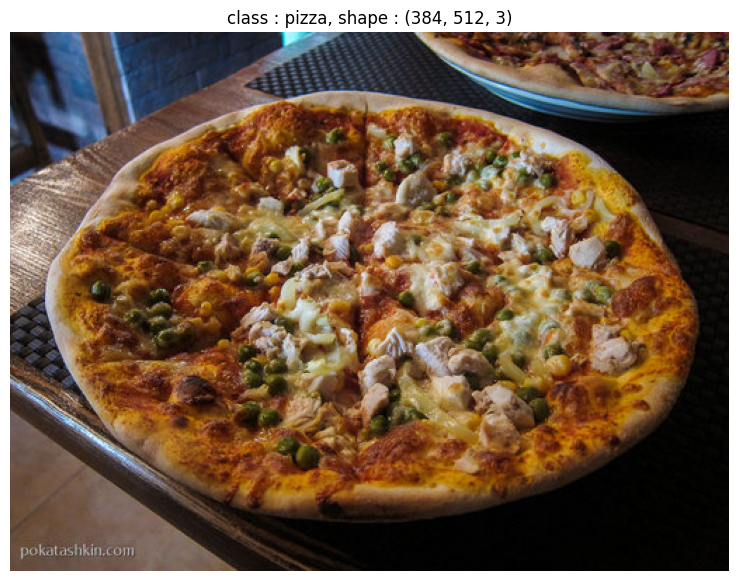

In [45]:
# visuailizg with matplotib
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
image_as_array = np.asarray(img)

# plot the img with plt
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f"class : {image_class}, shape : {image_as_array.shape}")
plt.axis(False);